In [20]:
%matplotlib inline

f: ./bg_data/fish1b.yml - 828977


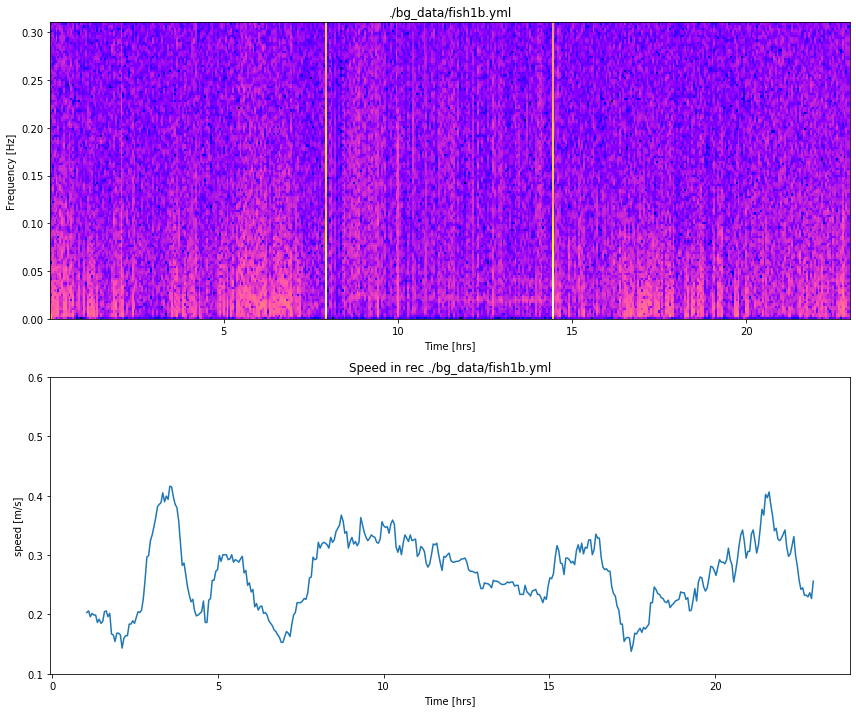

f: ./bg_data/fish10c.yml - 828953


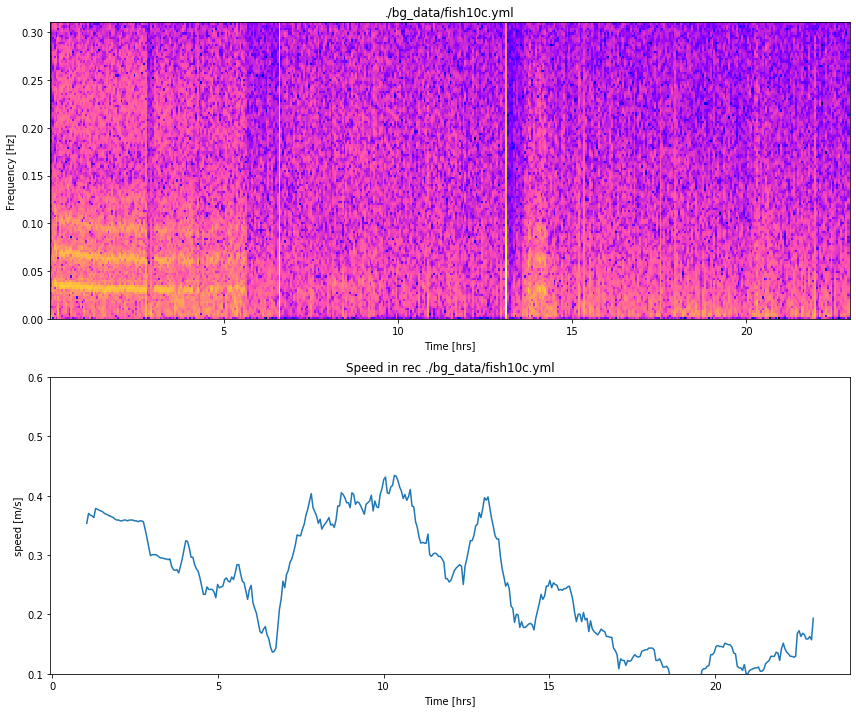

f: ./bg_data/fish10b.yml - 828947


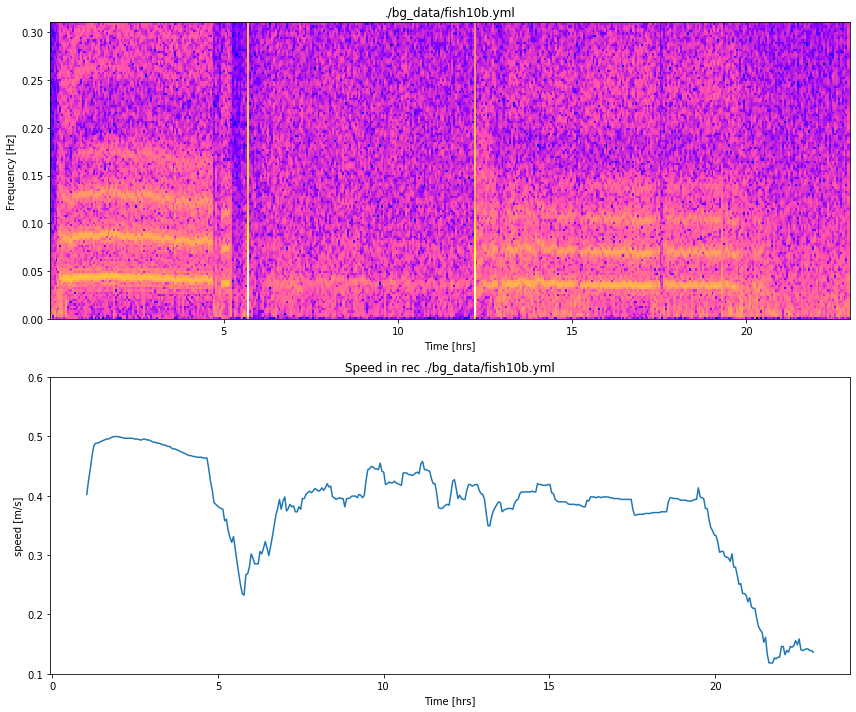

f: ./bg_data/fish10a.yml - 828945


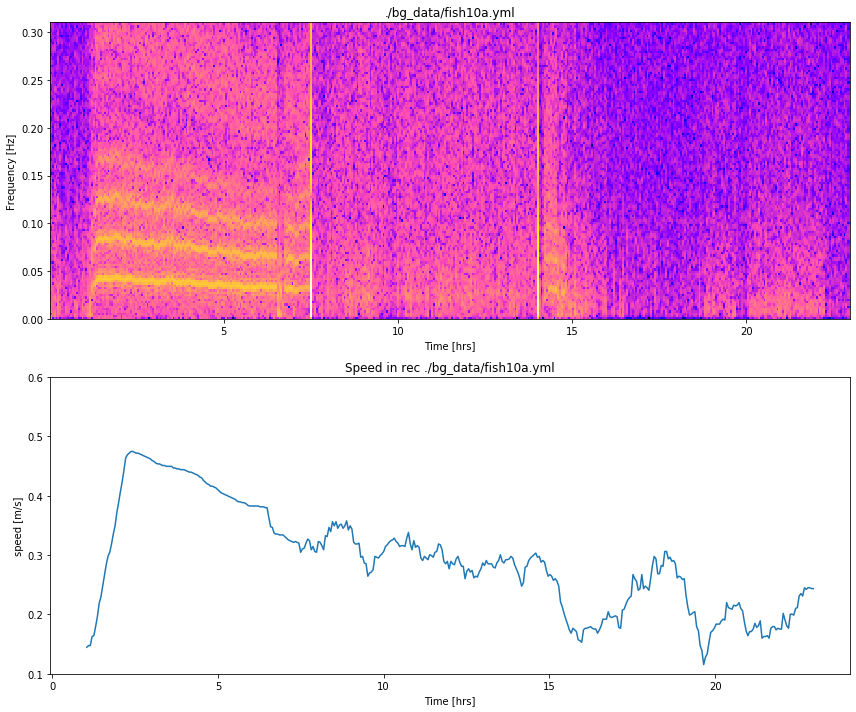

f: ./bg_data/fish5b.yml - 41867


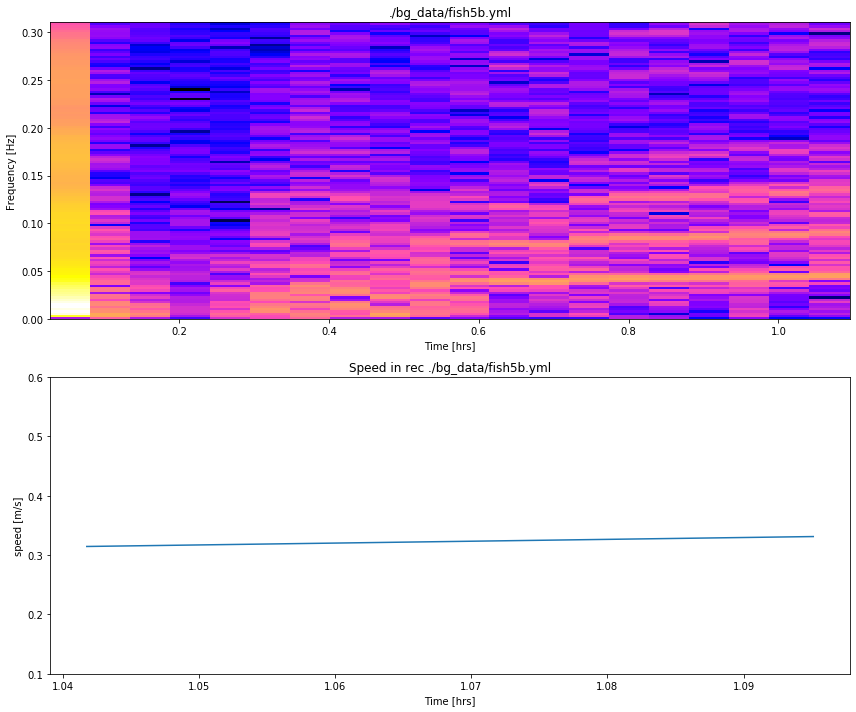

f: ./bg_data/fish5c.yml - 828951


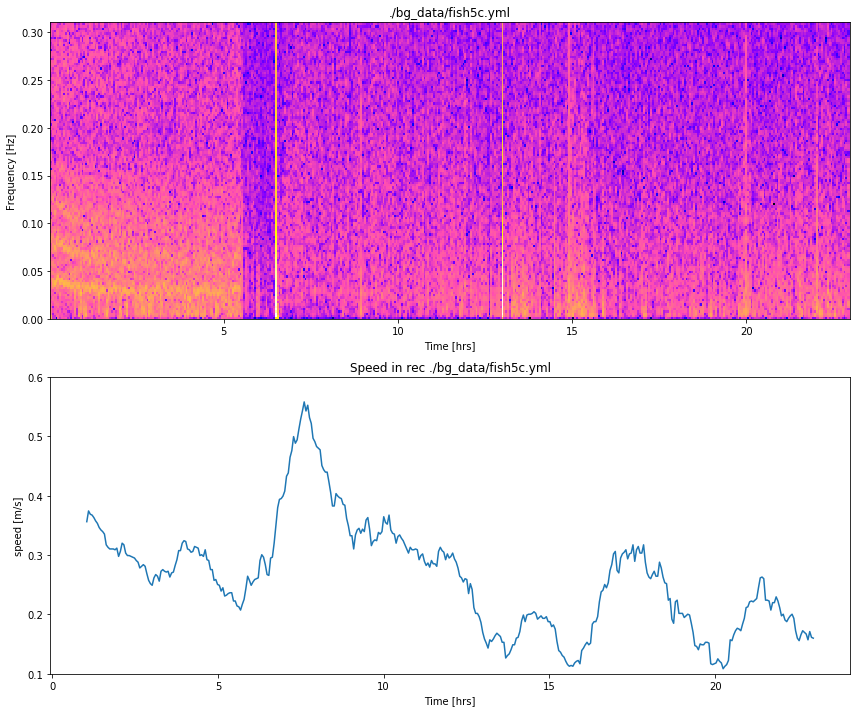

f: ./bg_data/fish5a_l.yml - 12
f: ./bg_data/fish5c_l2.yml - 502689


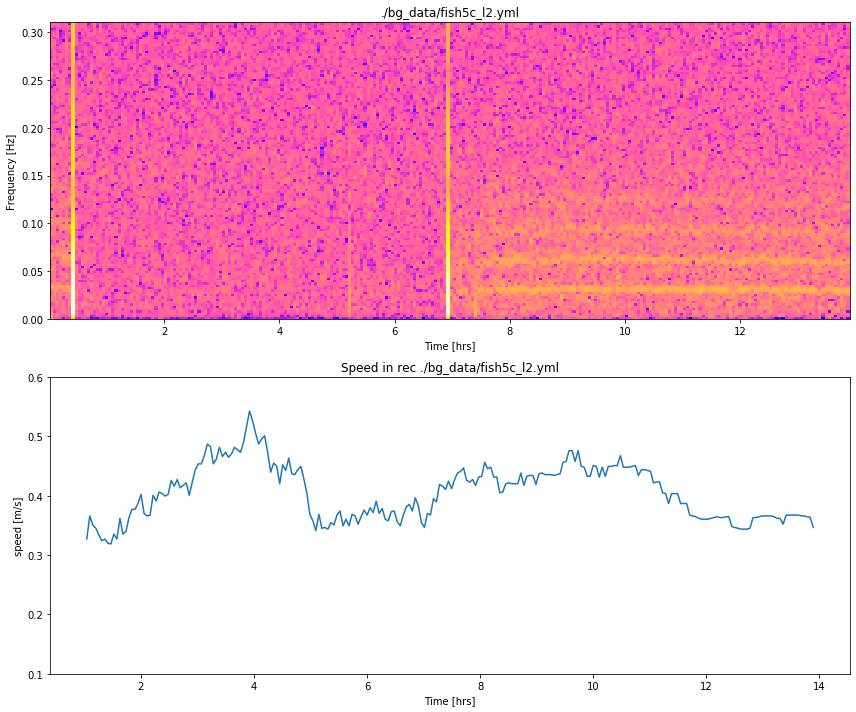

f: ./bg_data/fish5.yml - 684794


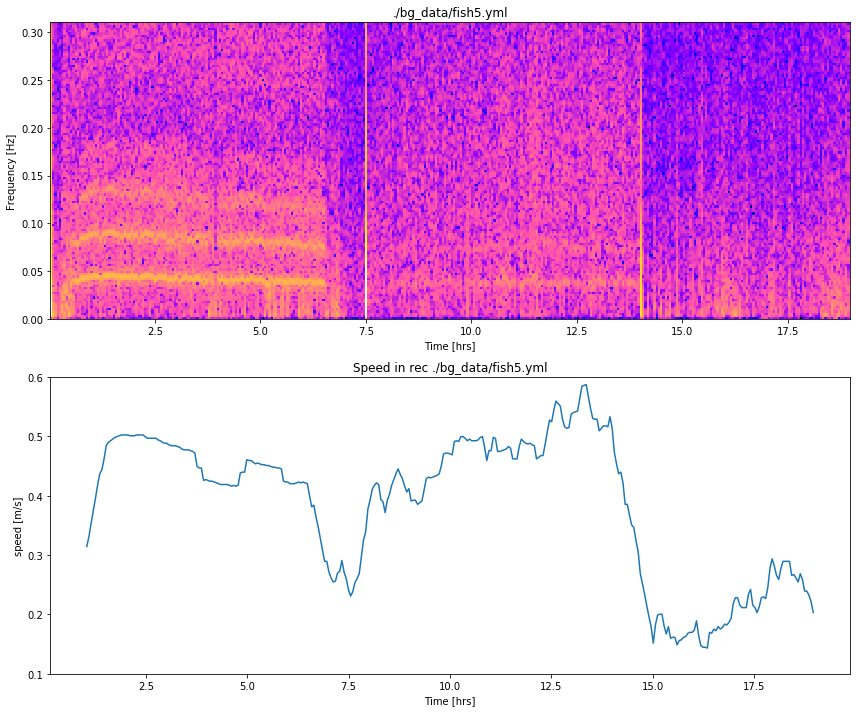

f: ./bg_data/fish5c_l1.yml - 325491


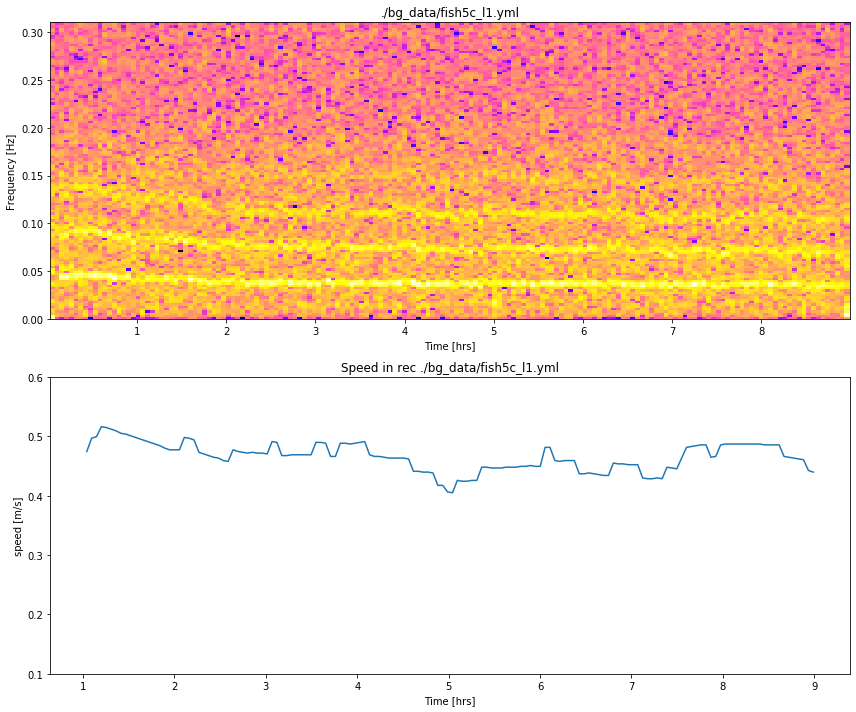

f: ./bg_data/fish10c_l.yml - 16


<Figure size 432x288 with 0 Axes>

In [46]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

iterator = 0
fs = 10 #a smpling frequency, our camera's input fps
#fig, axes = plt.subplots(len(mycircuits), 2,figsize=(12, 50))
flume_length=11.4#m

for key in mycircuits:
    print('f: {0} - {1}'.format(key,len(mycircuits[key])))
    signalis=[]
    #print(mycircuits[key][0])
    if type(mycircuits[key][0])!=float:
        for el in mycircuits[key]:
        #print(el[cind])
            signalis.append(el[1])
    else:  
        for el in mycircuits[key]:
            signalis.append(el)

    if len(signalis)<2048:
        continue
    sigfreq, sigtimes, sigspec = signal.spectrogram(np.array(signalis), fs,nfft=4096,nperseg=2048,noverlap = 128)

    cmap = plt.get_cmap('gnuplot2')
    end = int(len(sigfreq)/16) #only show low frequencies where movement happens

    fig, axes = plt.subplots(2, 1,figsize=(12, 10))

    iterator = 0
    #axes[iterator].pcolormesh(sigtimes, sigfreq[:end], 10*np.log10(sigspec[:end]), cmap=cmap)
    axes[iterator].pcolormesh(sigtimes/3600, sigfreq[:end], 10*np.log10(sigspec[:end]), cmap=cmap)
    axes[iterator].set_title(key)
    axes[iterator].set_ylabel('Frequency [Hz]')
    axes[iterator].set_xlabel('Time [hrs]')

    iterator=1
    speeds = pd.Series(flume_length*sigfreq[np.argmax(sigspec[:(end//4)],axis=0)])
    axes[iterator].plot(sigtimes/3600,speeds.rolling(window=20,center=False).mean())
    axes[iterator].set_title("Speed in rec {0}".format(key))
    axes[iterator].set_ylabel('speed [m/s]')
    axes[iterator].set_ylim([0.1,0.6])
    axes[iterator].set_xlabel('Time [hrs]')
    plt.tight_layout()
    plt.show()
    
plt.tight_layout()
#plt.show()


In [2]:
import glob
import yaml

allyamlsy = glob.glob('./bg_data/*yml')

print(allyamlsy)
mycircuits = dict()
for f in allyamlsy:
    with open(f,'r') as mfile:
        mycircuits[f]=yaml.safe_load(mfile)
print('done')
        

['./bg_data/fish1b.yml', './bg_data/fish10c.yml', './bg_data/fish10b.yml', './bg_data/fish10a.yml', './bg_data/fish5b.yml', './bg_data/fish5c.yml', './bg_data/fish5a_l.yml', './bg_data/fish5c_l2.yml', './bg_data/fish5.yml', './bg_data/fish5c_l1.yml', './bg_data/fish10c_l.yml']
done


In [8]:
import yaml 
with open('fish1.yml', 'r') as mfile:
    fish1 = yaml.safe_load(mfile)

with open('fish5.yml', 'r') as mfile:
    fish5 = yaml.safe_load(mfile)

with open('fish10a.yml', 'r') as mfile:
    fish10a = yaml.safe_load(mfile)

with open('fish10b.yml', 'r') as mfile:
    fish10b = yaml.safe_load(mfile)

    

tfish1={"1338":0,"2100":285017,"0400":518991}
tfish5={"2100":270569,"1405":0,"0400":504528}
tfish10a={"2100":270490,"1405":0,"0400":504473}
tfish10b={"2100":204719,"1405":0,"0400":438694}

f5 = fish5 #the shortest fish run
f1tmp = fish1[int(tfish1['2100']-(tfish10a['2100']+tfish5['2100'])/2):]
f1 = f1tmp[:len(f5)]
f10 = fish10a[0:len(f5)]
f10a = fish10a[int(tfish10a['2100']-tfish10b['2100']):-1]
f10b = fish10b[:len(f10a)]


/Users/mix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


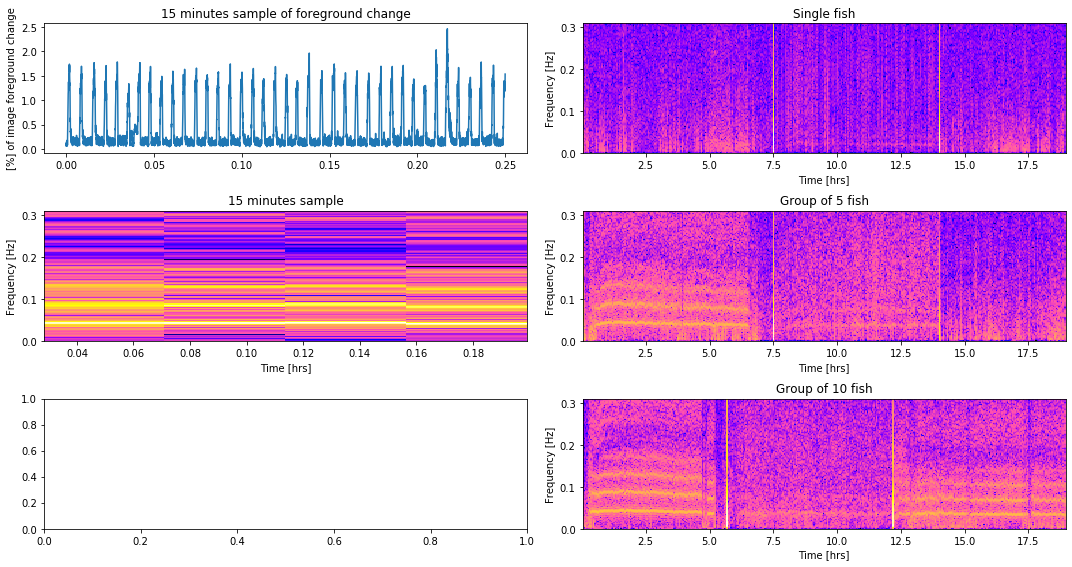

In [50]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
fs = 10 #a smpling frequency, our camera's input fps

l=len(f1)
time = np.array(range(0,l))/(3600*fs)

f5p = 10*np.log10(np.array(f5))
f5p = np.array(f5)
f1p = np.array(f1)
f10 = fish10b[0:len(f5)]
f10p = np.array(f10)


min15sample = np.array(f10[int(36000*2.5):int(36000*(2.5+(0.25)))])

# Plots
fig, axes = plt.subplots(3, 2, figsize=(15, 8))

frequencies5, times, spectrogram5 = signal.spectrogram(f5p, fs,nfft=4096,nperseg=2048,noverlap = 128)
frequencies1, times, spectrogram1 = signal.spectrogram(f1p, fs,nfft=4096,nperseg=2048,noverlap = 128)
frequencies10, times, spectrogram10 = signal.spectrogram(f10p, fs,nfft=4096,nperseg=2048,noverlap = 128)


frequencies15min, times15min, spectrogram15min = signal.spectrogram(min15sample, fs,nfft=4096,nperseg=2048,
                                                                    noverlap = 512)

cmap = plt.get_cmap('gnuplot2')
end = int(len(frequencies1)/16) #only show low frequencies where movement happens



#axes[row, column]
axes[0, 0].plot(time[:len(min15sample)],min15sample)
axes[0, 0].set_title("15 minutes sample of foreground change")
axes[0, 0].set_ylabel('[%] of image foreground change')
#axes[0, 0].set_ylabel('Time [hrs]')

axes[1, 0].pcolormesh(times15min/3600, frequencies15min[:end], 10*np.log10(spectrogram15min[:end]), cmap=cmap)
axes[1, 0].set_title("15 minutes sample")
axes[1, 0].set_ylabel('Frequency [Hz]')
axes[1, 0].set_xlabel('Time [hrs]')

axes[0, 1].pcolormesh(times/3600, frequencies1[:end], 10*np.log10(spectrogram1[:end]), cmap=cmap)
axes[0, 1].set_title("Single fish")
axes[0, 1].set_ylabel('Frequency [Hz]')
axes[0, 1].set_xlabel('Time [hrs]')

axes[1, 1].pcolormesh(times/3600, frequencies5[:end], 10*np.log10(spectrogram5[:end]), cmap=cmap)
axes[1, 1].set_title("Group of 5 fish")
axes[1, 1].set_ylabel('Frequency [Hz]')
axes[1, 1].set_xlabel('Time [hrs]')

axes[2, 1].pcolormesh(times/3600, frequencies10[:end], 10*np.log10(spectrogram10[:end]), cmap=cmap)
axes[2, 1].set_title("Group of 10 fish")
axes[2, 1].set_ylabel('Frequency [Hz]')
axes[2, 1].set_xlabel('Time [hrs]')


#axes[2, 1].plot(11.4*frequencies5[np.argmax(spectrogram5    ,axis=0)])
#axes[2, 1].set_title("Speed of 10 fish")
#axes[2, 1].set_ylabel('speed [m/s]')
#axes[2, 1].set_ylim([0,0.6])
#axes[2, 1].set_xlabel('Time [hrs]')
#axes[1, 1].set_xticks(time)
plt.tight_layout()


xdisplay=5
ydisplay=5
offset = 20
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle,angleA=0,angleB=90,rad=10")

#disp = axes[1,1].annotate('data = (%.1f, %.1f)'%(xdisplay, ydisplay),
#            (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
#            textcoords='offset points',
#            bbox=bbox, arrowprops=arrowprops)


plt.show()


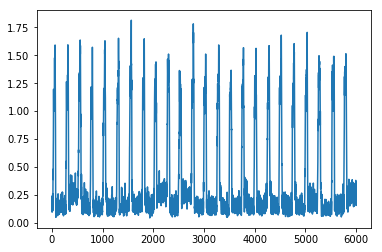

In [40]:
plt.plot(f10[int(36000*2.5):int(36000*(2.5+(1/6)))])

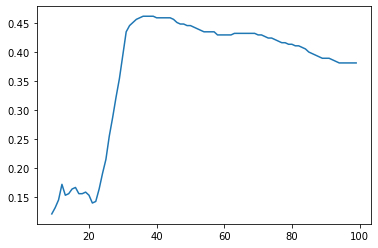

In [179]:
import pandas as pd
#plt.plot(spectrogram15min[:end,0])
#spectrogram1.shape
#freq is rounds per second, so to have speed I need m/s, so multiply it by length of flume
#speeds = pd.Series(11*frequencies5[np.argmax(spectrogram1,axis=0)[:]])
#speeds = pd.Series(11*frequencies5[np.argmax(spectrogram5,axis=0)[20:100]])
speeds = pd.Series(11*frequencies5[np.argmax(spectrogram10,axis=0)[0:100]])
plt.plot(speeds.rolling(window=10,center=False).mean())

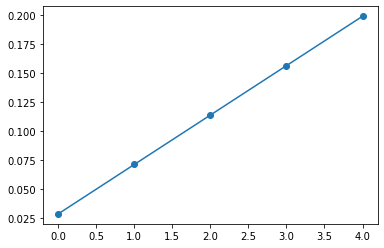

In [34]:
#plt.plot(np.argmax(spectrogram15min,axis=0))
plt.plot(times15min/3600, marker='o')

In [58]:
    speeds = pd.Series(flume_length*sigfreq[np.argmax(sigspec[:(end//4)],axis=0)])
    axes[iterator].plot(sigtimes/3600,speeds.rolling(window=10,center=False).mean())frequencies1[-1]

5.0

/Users/mix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


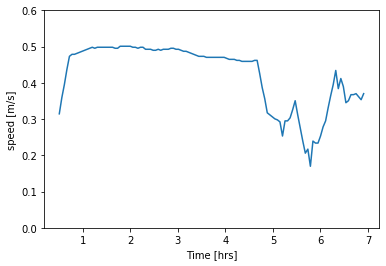

In [51]:
speeds = pd.Series(11.4*frequencies5[np.argmax(spectrogram10,axis=0)])

eee = 130
a = plt.figure()
plt.plot(times[:eee]/3600,speeds.rolling(window=10,center=False).mean()[:eee])
plt.ylabel('speed [m/s]')
plt.ylim([0,0.6])
plt.xlabel('Time [hrs]')
a.show()